In [1]:
# library import
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [20,10]

In [3]:
#Importing the dataframe
breast_cancer  = datasets.load_breast_cancer()

In [4]:
#Description of the dataset
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
#This is just to chance the boolean-numerical data to their real meaning
resultado = lambda x : breast_cancer.target_names[x]

In [5]:
#Breast cancer data frame
breast_data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
breast_data['Cancer'] = breast_cancer.target
#Changing column names
breast_data.Cancer = breast_data.Cancer.apply(resultado)
breast_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


## Shaping the DataSet

In [6]:
# Dataset Description
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

##### Looking for empty values

In [7]:
#Check for Null values 
breast_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

In [8]:
#Check for NaN values
breast_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

##### Now that we know there no null nor nan values, we can tell the shape

In [9]:
bc_shape = breast_data.shape

print("The number of observatios is: ",bc_shape[0])
print("The number of columns is: ",bc_shape[1])

The number of observatios is:  569
The number of columns is:  31


##### We check what are the available columns

In [10]:
# Data columns
print('The columns to take into consideration are: \n')
for element in breast_data.columns.tolist():
    print(element)

The columns to take into consideration are: 

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
Cancer


In [11]:
#Looking for duplicated data
breast_data[breast_data.duplicated()==True]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer


In [12]:
#Varibale dist
breast_data.Cancer.value_counts()

benign       357
malignant    212
Name: Cancer, dtype: int64

<BarContainer object of 2 artists>

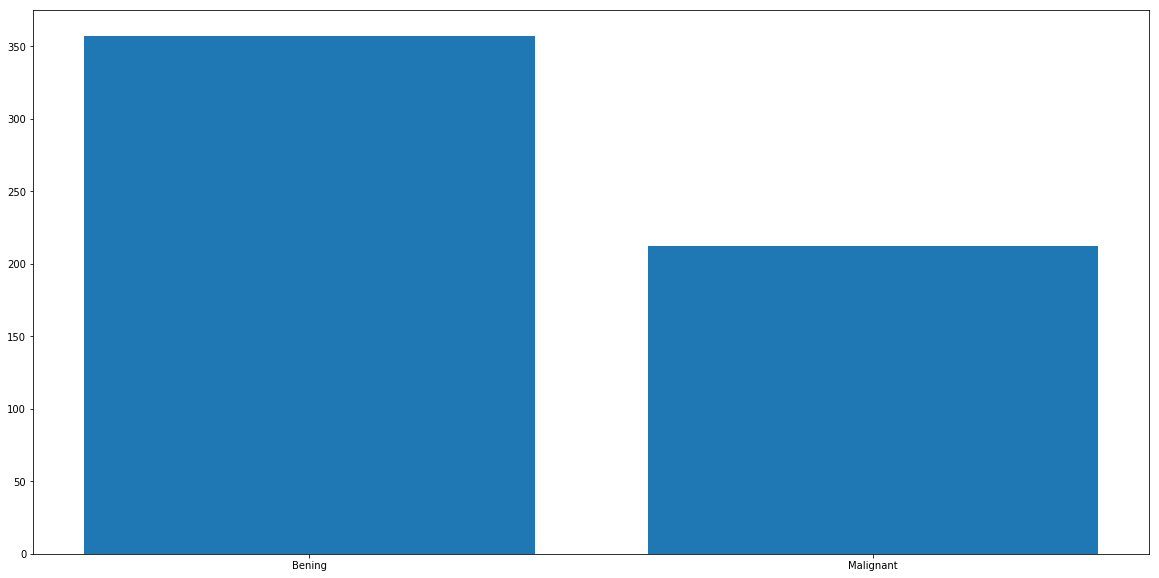

In [13]:
#Looking for the balance of de data
plt.bar(['Bening','Malignant'],breast_data.Cancer.value_counts())

# We saw there were three types of variables, the "mean...", "... worst" and "...error", this is why we decided to split our dataset into three parts, each one for every type of variable

## $Means$

In [14]:
# Slicing the dataframe in order to get only the variables that we want for this section and getting our cateogrical value

mean = breast_data[breast_data.columns[:10]]
mean['Cancer'] = breast_data['Cancer']
mean.head()

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,malignant


In [15]:
#We describe the data of the "mean's" columns 
mean.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


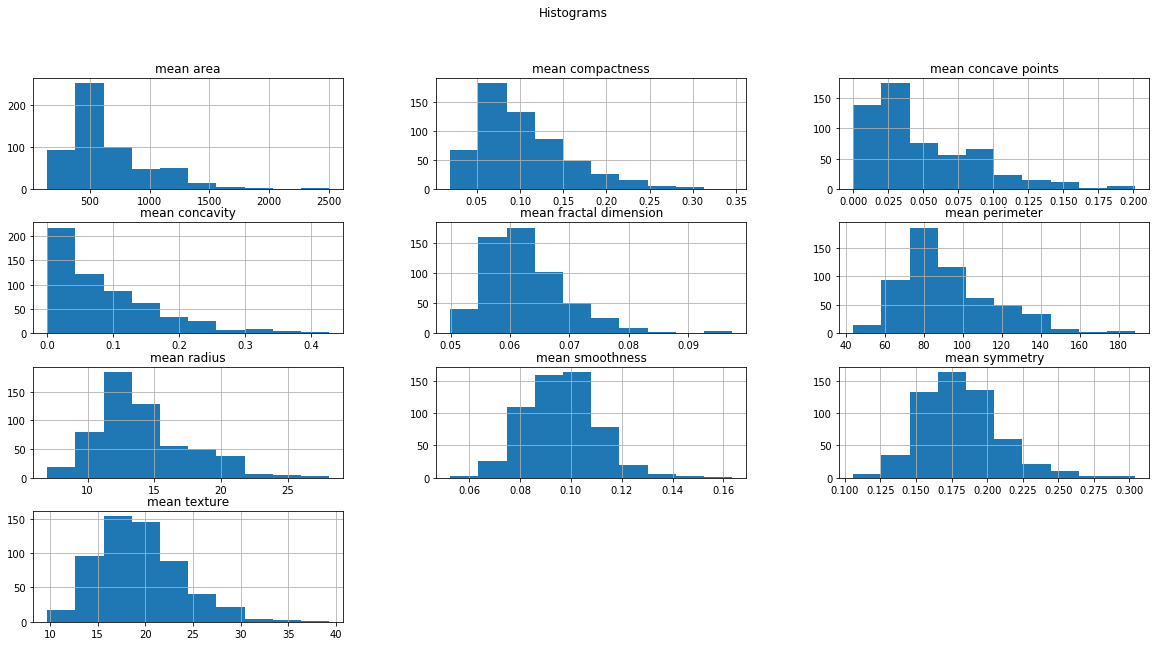

In [16]:
# Variable Distribution
mean.hist()
plt.suptitle("Histograms")
plt.show()

In [17]:
#Here we look for the skewness 
mean.skew()
"""
getting skewness of each column
where value = 0 means is symmetrical
value > 0 means is positive asymmetrical
value < 0 means is negative asymmetrical
"""

mean radius               0.942380
mean texture              0.650450
mean perimeter            0.990650
mean area                 1.645732
mean smoothness           0.456324
mean compactness          1.190123
mean concavity            1.401180
mean concave points       1.171180
mean symmetry             0.725609
mean fractal dimension    1.304489
dtype: float64

C:\Users\Andres\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


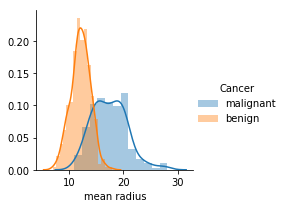

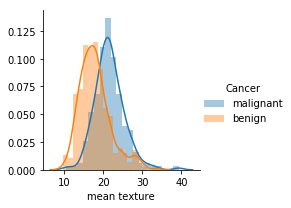

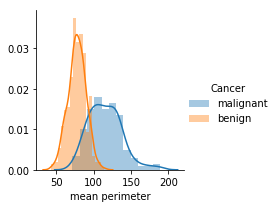

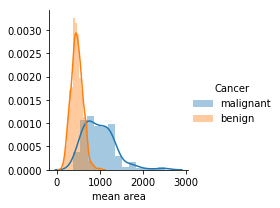

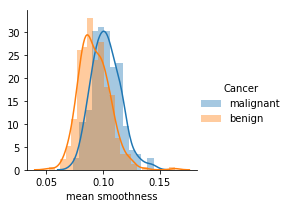

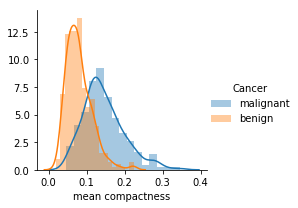

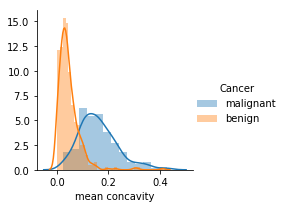

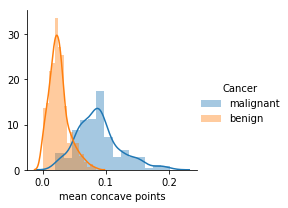

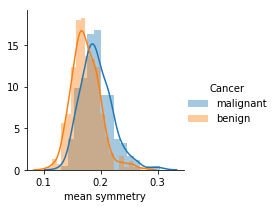

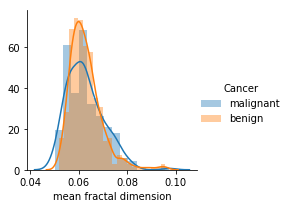

In [18]:
# Getting a close up to every distribution in each varaibles comparison 
# From here we will get which variables will be the most efficient to future calculations
for columns in mean.columns[:len(mean.columns)-1]:
    g = sns.FacetGrid(mean, hue = 'Cancer')
    g = g.map(sns.distplot, columns)
    g = g.add_legend()
    plt.show()

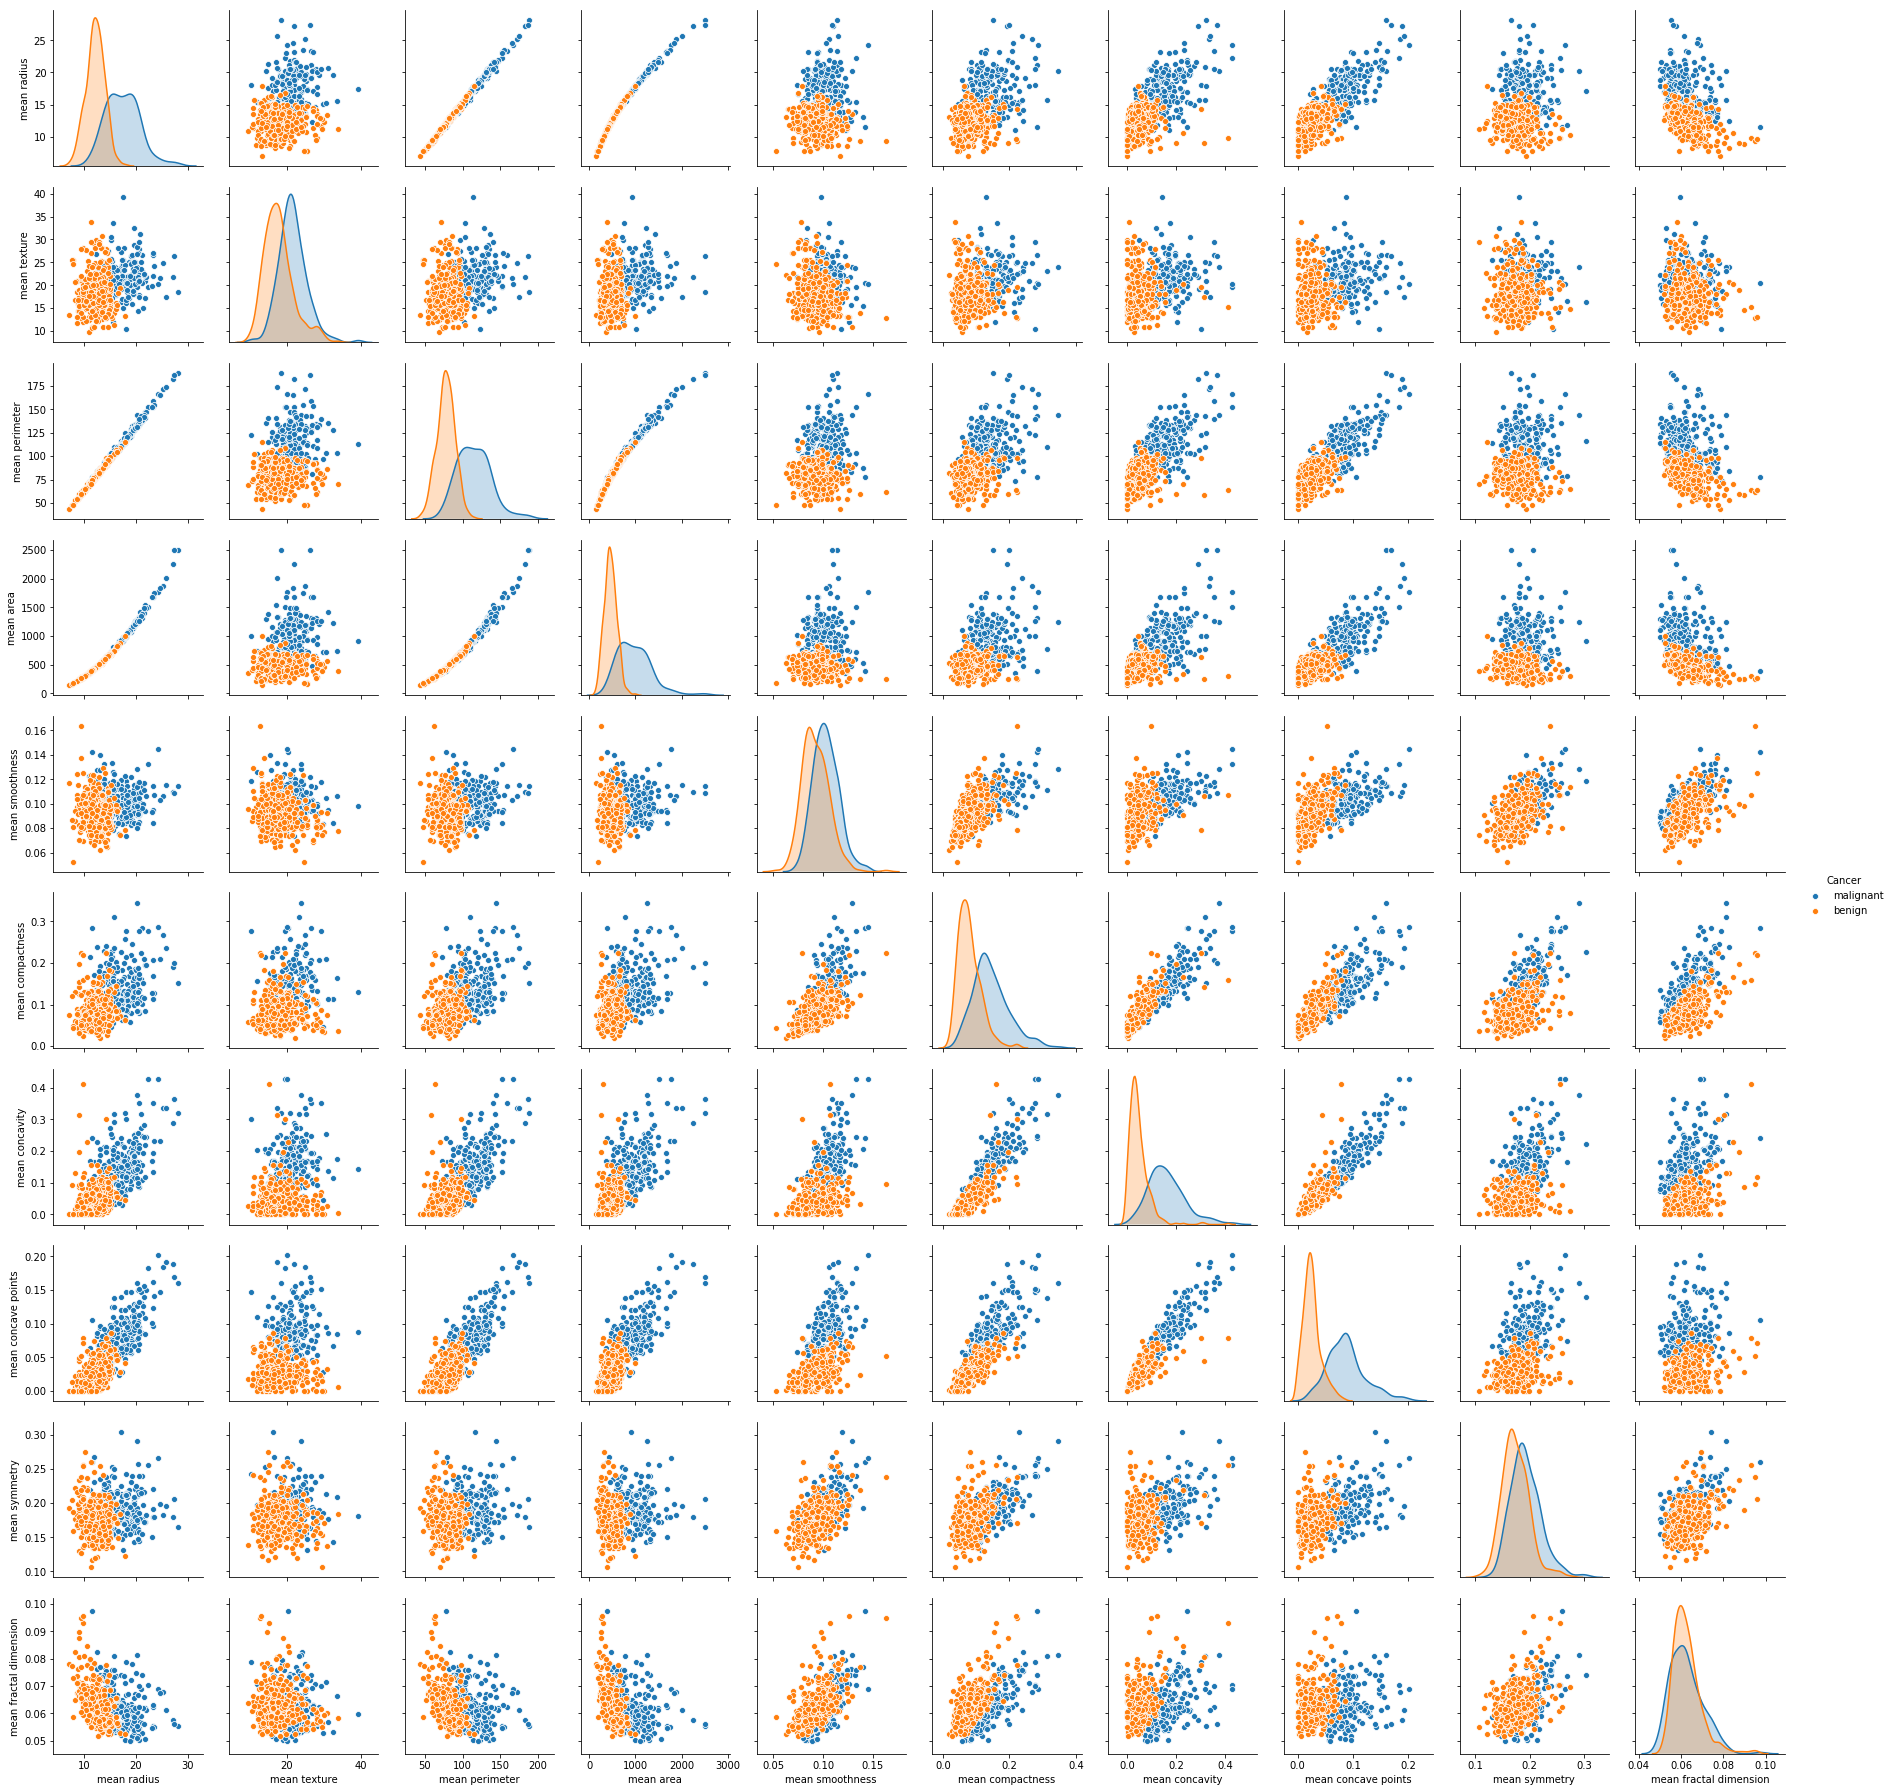

In [19]:
#Here plot the scatter graph in order to see some correlations 
from pandas.plotting import scatter_matrix
g = sns.pairplot(mean,hue='Cancer')
plt.show()

In [20]:
mean.kurtosis()
"""
Getting the kurtosis measurement that means if the curve is Leptokurtic, value > 0, the data is containing in the median 
or rather in the interquartile rangge
if it is Mesokurtic means is normal and the value is equal to 0
or if it is Platykurtic means that the tails have weight or a lof of values, value < 0
"""

mean radius               0.845522
mean texture              0.758319
mean perimeter            0.972214
mean area                 3.652303
mean smoothness           0.855975
mean compactness          1.650130
mean concavity            1.998638
mean concave points       1.066556
mean symmetry             1.287933
mean fractal dimension    3.005892
dtype: float64

In [56]:
#Getting the median
mean_median = mean.median()
mean_median

mean radius                13.37000
mean texture               18.84000
mean perimeter             86.24000
mean area                 551.10000
mean smoothness             0.09587
mean compactness            0.09263
mean concavity              0.06154
mean concave points         0.03350
mean symmetry               0.17920
mean fractal dimension      0.06154
dtype: float64

In [57]:
#Getting the mode
mean_mode = mean.mode()
mean_mode

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Cancer
0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,benign
1,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,0.05907,NaN
2,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,0.05913,NaN
3,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,0.06113,NaN
4,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,0.06782,NaN
5,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## $Errors$

In [23]:
# Slicing the dataframe in order to get only the variables that we want for this section and getting our categorical value

error = breast_data[breast_data.columns[10:20]]
error['Cancer'] = breast_data['Cancer']
error.head()

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,Cancer
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,malignant
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,malignant
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,malignant
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,malignant
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,malignant


In [24]:
error.describe()

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


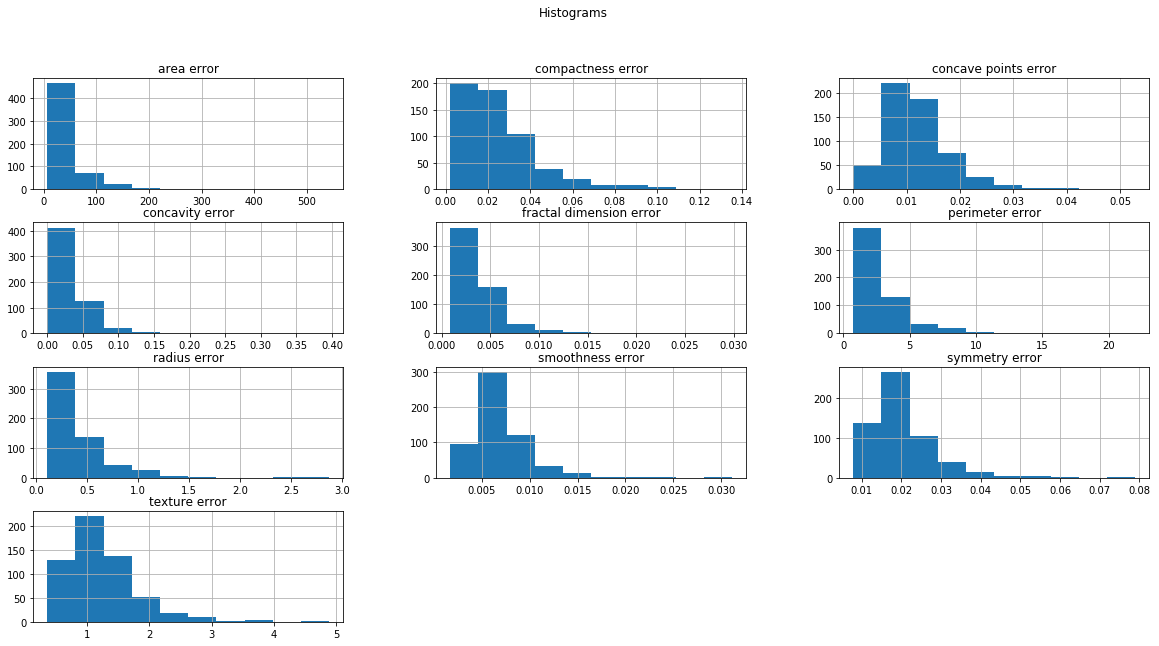

In [25]:
# Variable Distribution
error.hist()
plt.suptitle("Histograms")
plt.show()

In [26]:
#Here we look for the skewness 
error.skew()
"""
getting skewness of each column
where value = 0 means is symmetrical
value > 0 means is positive asymmetrical
value < 0 means is negative asymmetrical
"""

radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
dtype: float64

C:\Users\Andres\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


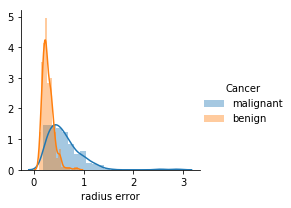

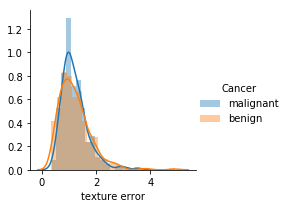

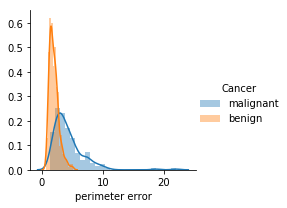

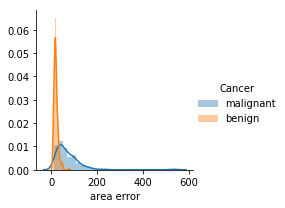

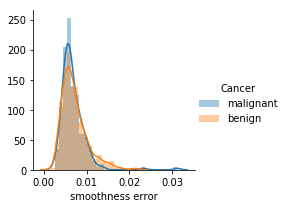

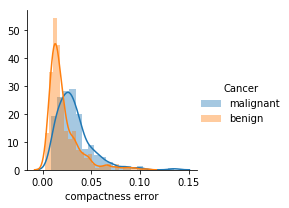

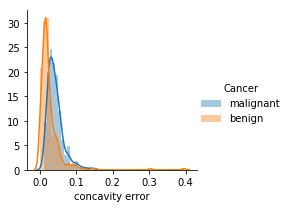

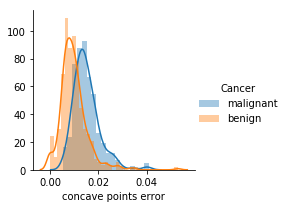

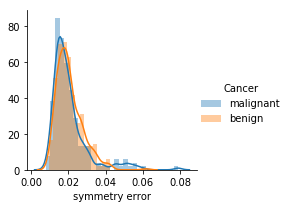

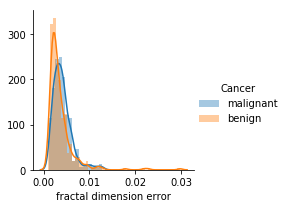

In [27]:
# Getting a close up to every distribution in each varaibles comparison 
# From here we will get which variables will be the most efficient to future calculations

for columns in error.columns[:len(error.columns)-1]:
    g = sns.FacetGrid(error, hue = 'Cancer')
    g = g.map(sns.distplot, columns)
    g = g.add_legend()
    plt.show()

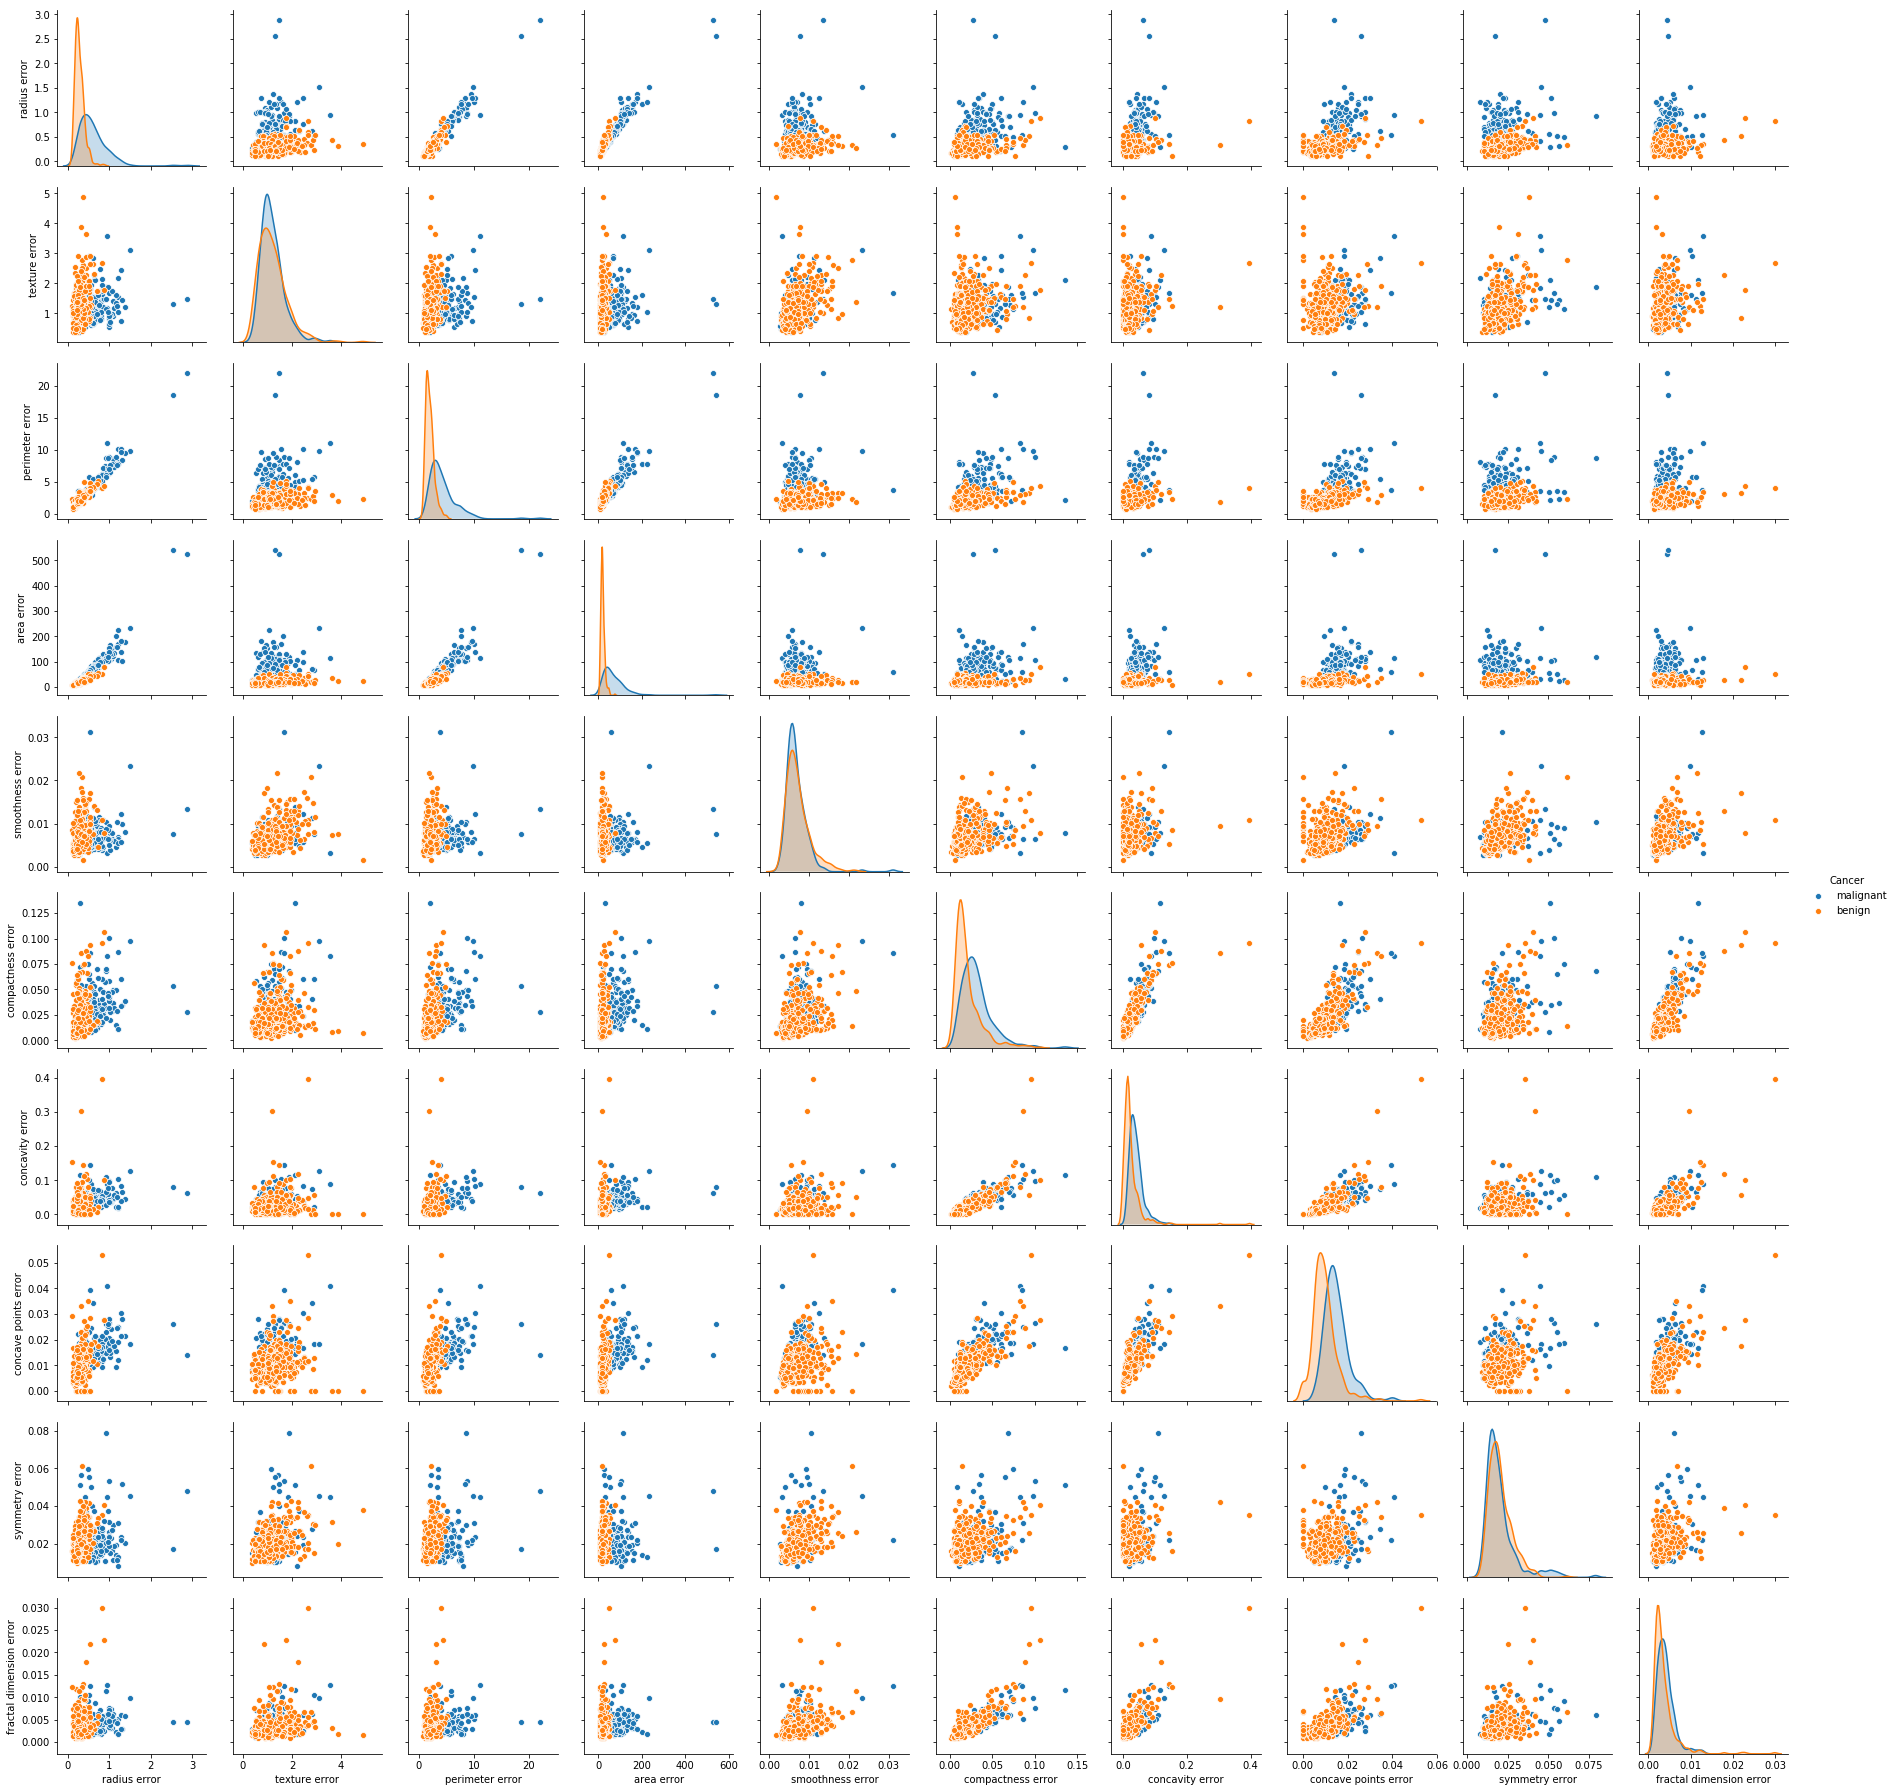

In [28]:
#Here plot the scatter graph in order to see some correlations 
from pandas.plotting import scatter_matrix
g = sns.pairplot(error,hue='Cancer')
plt.show()

In [29]:
error.kurtosis()
"""
Getting the kurtosis measurement that means if the curve is Leptokurtic, value > 0, the data is containing in the median 
or rather in the interquartile rangge
if it is Mesokurtic means is normal and the value is equal to 0
or if it is Platykurtic means that the tails have weight or a lof of values, value < 0
"""

radius error               17.686726
texture error               5.349169
perimeter error            21.401905
area error                 49.209077
smoothness error           10.469840
compactness error           5.106252
concavity error            48.861395
concave points error        5.126302
symmetry error              7.896130
fractal dimension error    26.280847
dtype: float64

In [30]:
#Getting the median
error_median = error.median()
error_median

radius error                0.324200
texture error               1.108000
perimeter error             2.287000
area error                 24.530000
smoothness error            0.006380
compactness error           0.020450
concavity error             0.025890
concave points error        0.010930
symmetry error              0.018730
fractal dimension error     0.003187
dtype: float64

In [40]:
#Getting the mode
error_mode = error.mode()
error_mode

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,Cancer
0,0.2204,0.8561,1.778,16.64,0.005080,0.01104,0.0,0.0,0.01344,0.001784,benign
1,0.2860,1.1500,NaN,16.97,0.005251,0.01812,NaN,NaN,NaN,0.001892,NaN
2,NaN,1.2680,NaN,17.67,0.005298,0.02310,NaN,NaN,NaN,0.001906,NaN
3,NaN,1.3500,NaN,18.54,0.005518,NaN,NaN,NaN,NaN,0.001956,NaN
4,NaN,NaN,NaN,NaN,0.005884,NaN,NaN,NaN,NaN,0.001971,NaN
5,NaN,NaN,NaN,NaN,0.005910,NaN,NaN,NaN,NaN,0.001976,NaN
6,NaN,NaN,NaN,NaN,0.005969,NaN,NaN,NaN,NaN,0.002205,NaN
7,NaN,NaN,NaN,NaN,0.006040,NaN,NaN,NaN,NaN,0.002256,NaN
8,NaN,NaN,NaN,NaN,0.006064,NaN,NaN,NaN,NaN,0.002551,NaN
9,NaN,NaN,NaN,NaN,0.006399,NaN,NaN,NaN,NaN,0.002665,NaN


## $Worsts$

In [41]:
# Slicing the dataframe in order to get only the variables that we want for this section and adding our categorical variable

worst = breast_data[breast_data.columns[20:30]]
worst['Cancer'] = breast_data['Cancer']
worst.head()

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [42]:
worst.describe()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


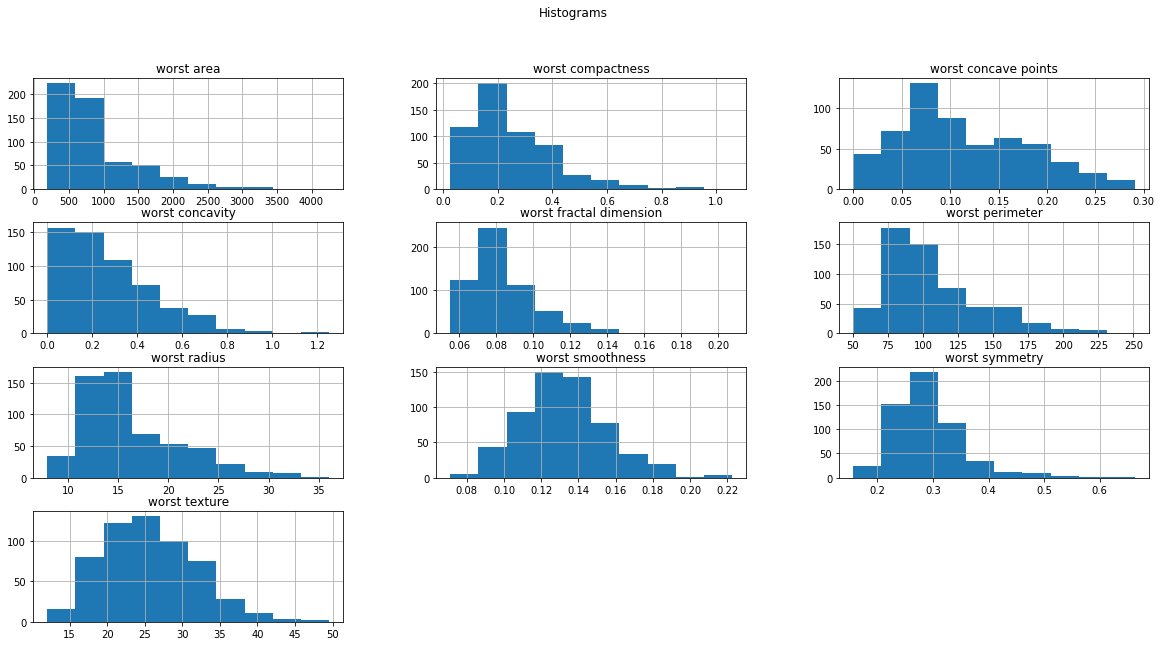

In [43]:
# Variable Distribution
worst.hist()
plt.suptitle("Histograms")
plt.show()

In [44]:
#Here we look for the skewness 
worst.skew()
"""
getting skewness of each column
where value = 0 means is symmetrical
value > 0 means is positive asymmetrical
value < 0 means is negative asymmetrical
"""

worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0.492616
worst symmetry             1.433928
worst fractal dimension    1.662579
dtype: float64

C:\Users\Andres\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


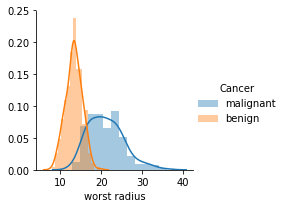

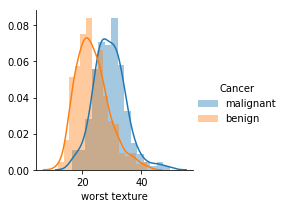

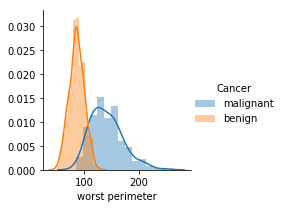

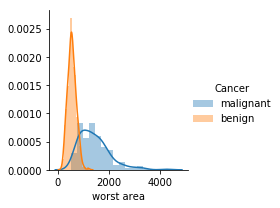

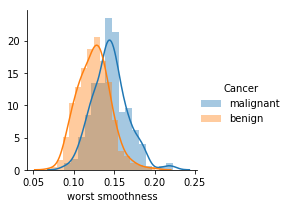

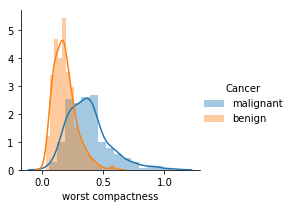

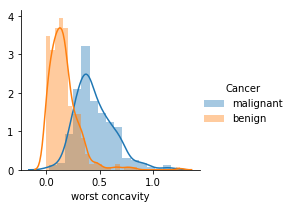

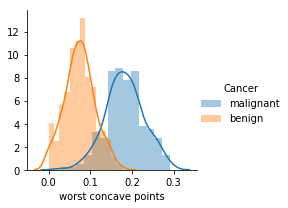

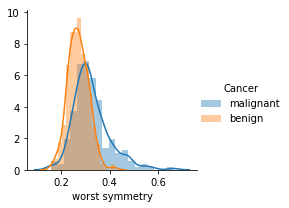

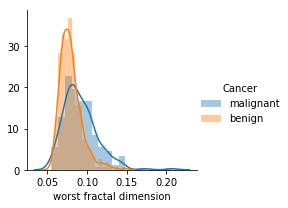

In [45]:
# Getting a close up to every distribution in each varaibles comparison 
# From here we will get which variables will be the most efficient to future calculations

for columns in worst.columns[:len(worst.columns)-1]:
    g = sns.FacetGrid(worst, hue = 'Cancer')
    g = g.map(sns.distplot, columns)
    g = g.add_legend()
    plt.show()

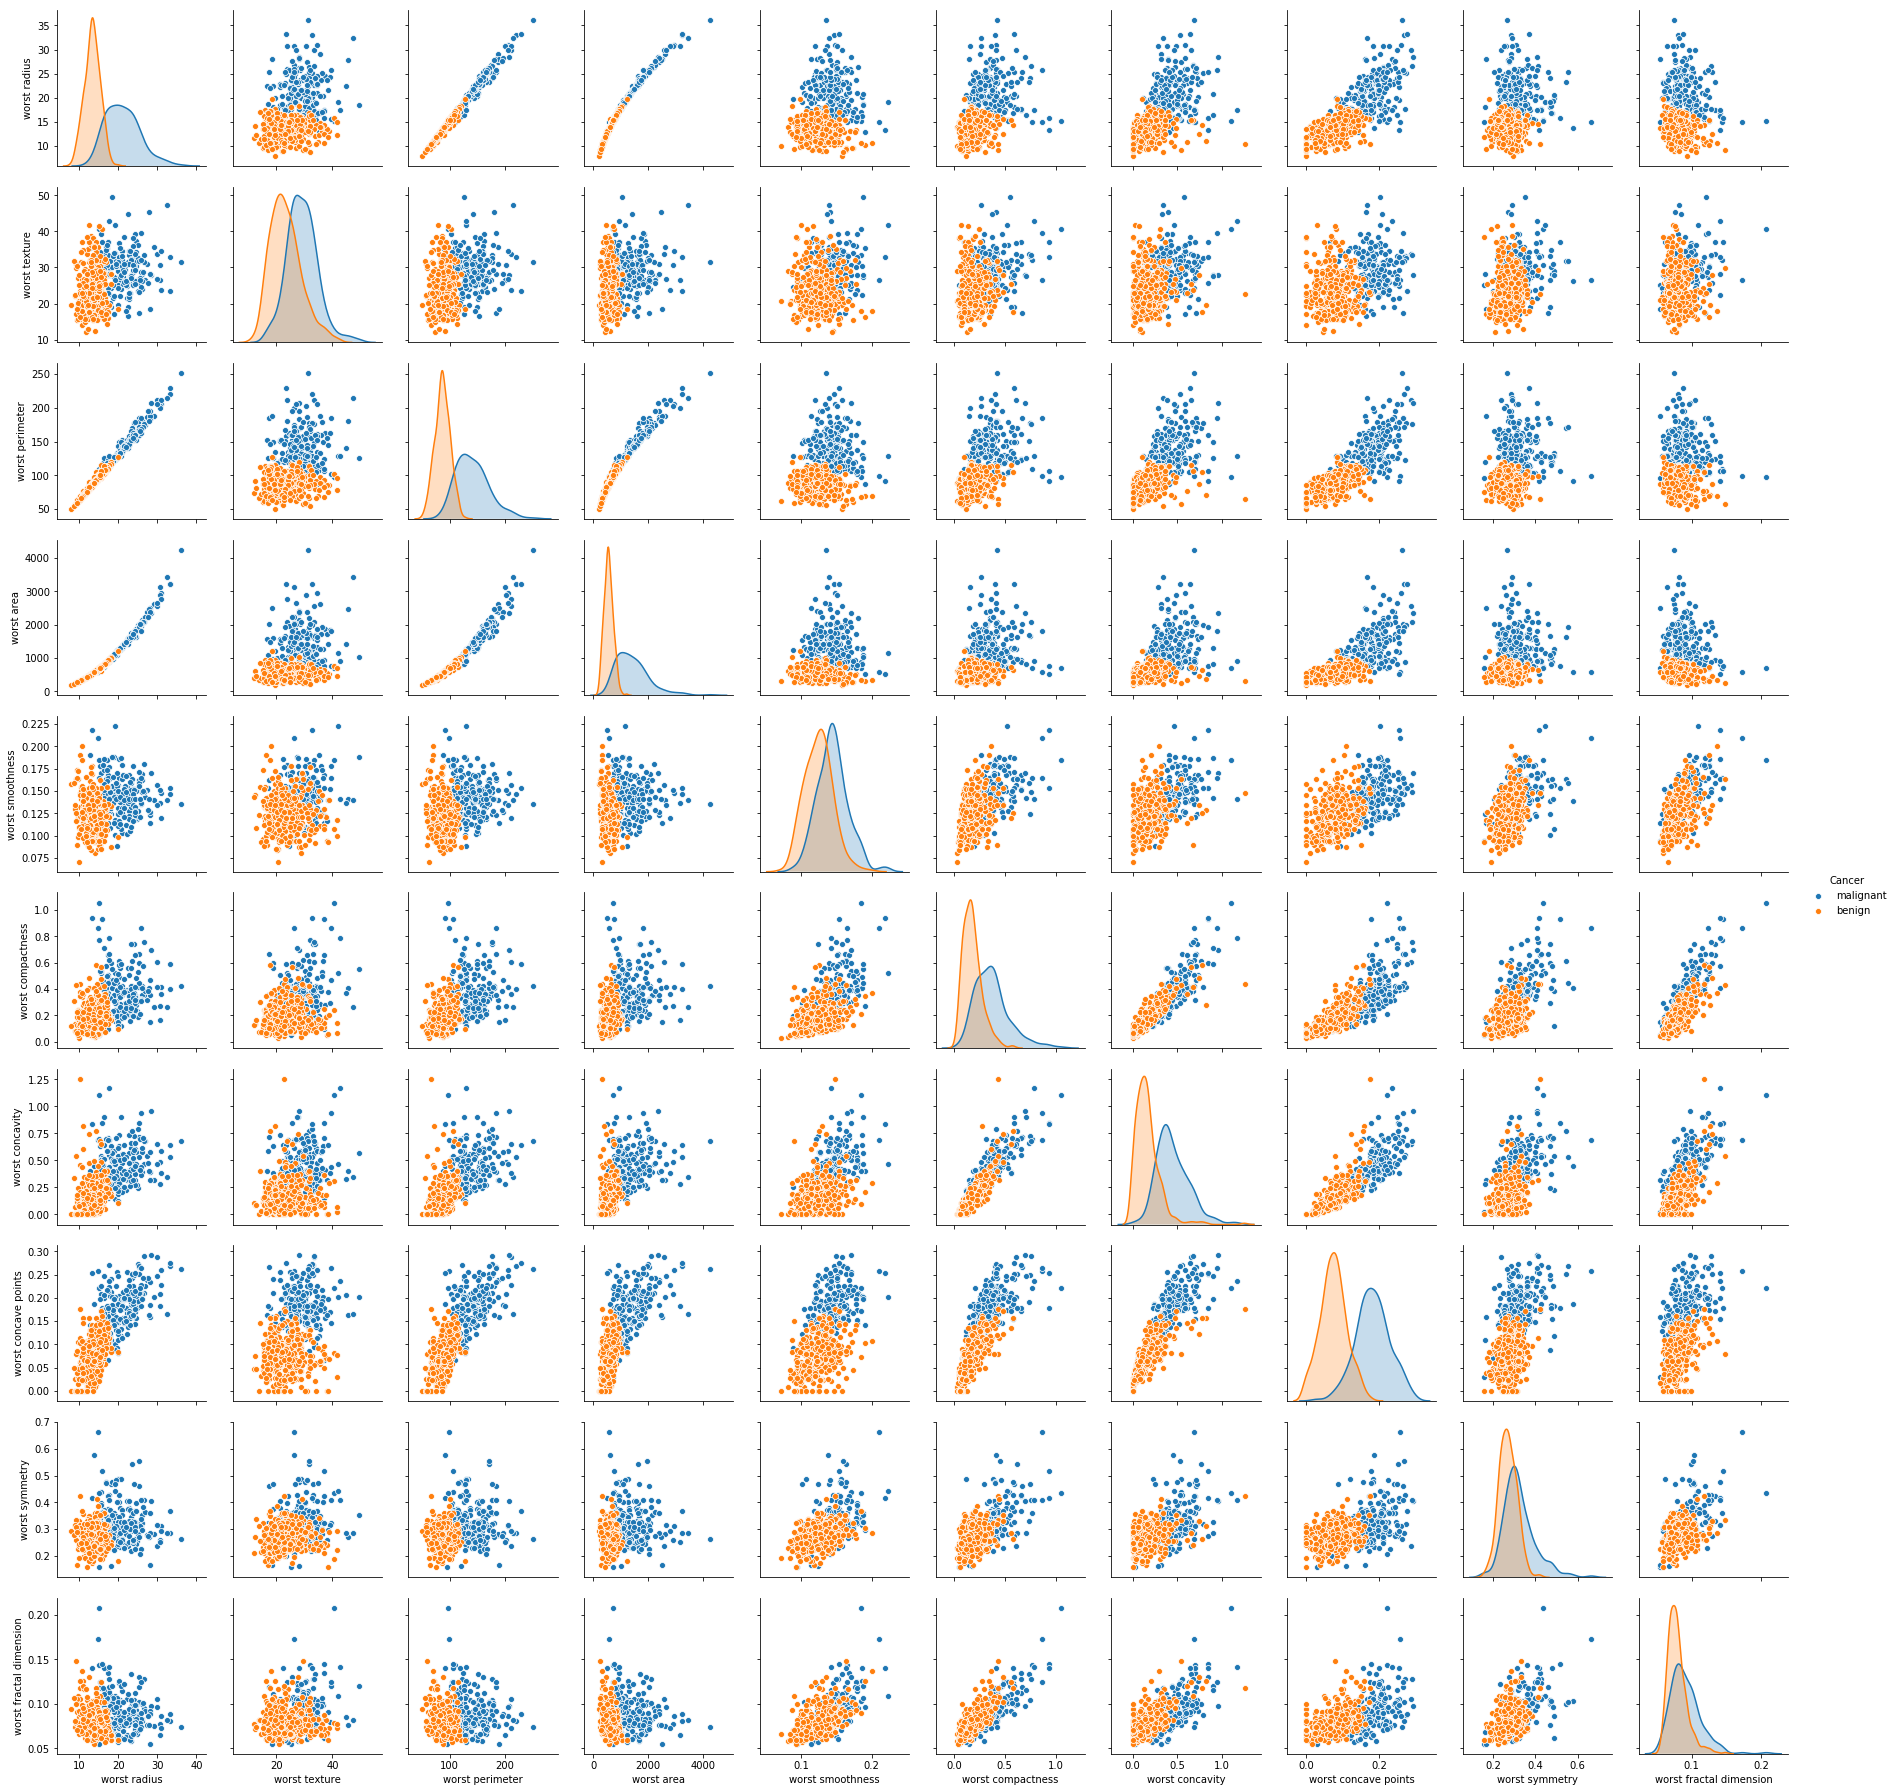

In [46]:
#Here plot the scatter graph in order to see some correlations 
from pandas.plotting import scatter_matrix
g = sns.pairplot(worst,hue='Cancer')
plt.show()

In [47]:
worst.kurtosis()
"""
Getting the kurtosis measurement that means if the curve is Leptokurtic, value > 0, the data is containing in the median 
or rather in the interquartile rangge
if it is Mesokurtic means is normal and the value is equal to 0
or if it is Platykurtic means that the tails have weight or a lof of values, value < 0
"""

worst radius               0.944090
worst texture              0.224302
worst perimeter            1.070150
worst area                 4.396395
worst smoothness           0.517825
worst compactness          3.039288
worst concavity            1.615253
worst concave points      -0.535535
worst symmetry             4.444560
worst fractal dimension    5.244611
dtype: float64

In [48]:
#Getting the median
worst_median = worst.median()
worst_median

worst radius                14.97000
worst texture               25.41000
worst perimeter             97.66000
worst area                 686.50000
worst smoothness             0.13130
worst compactness            0.21190
worst concavity              0.22670
worst concave points         0.09993
worst symmetry               0.28220
worst fractal dimension      0.08004
dtype: float64

In [49]:
#Getting the mode
worst_mode = worst.mode()
worst_mode

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,benign
1,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN,NaN
2,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN,NaN
3,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN,NaN
4,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN,NaN
5,NaN,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN,NaN
6,NaN,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Here we plot the correlation matrix in order to see the correlation of all of our variables

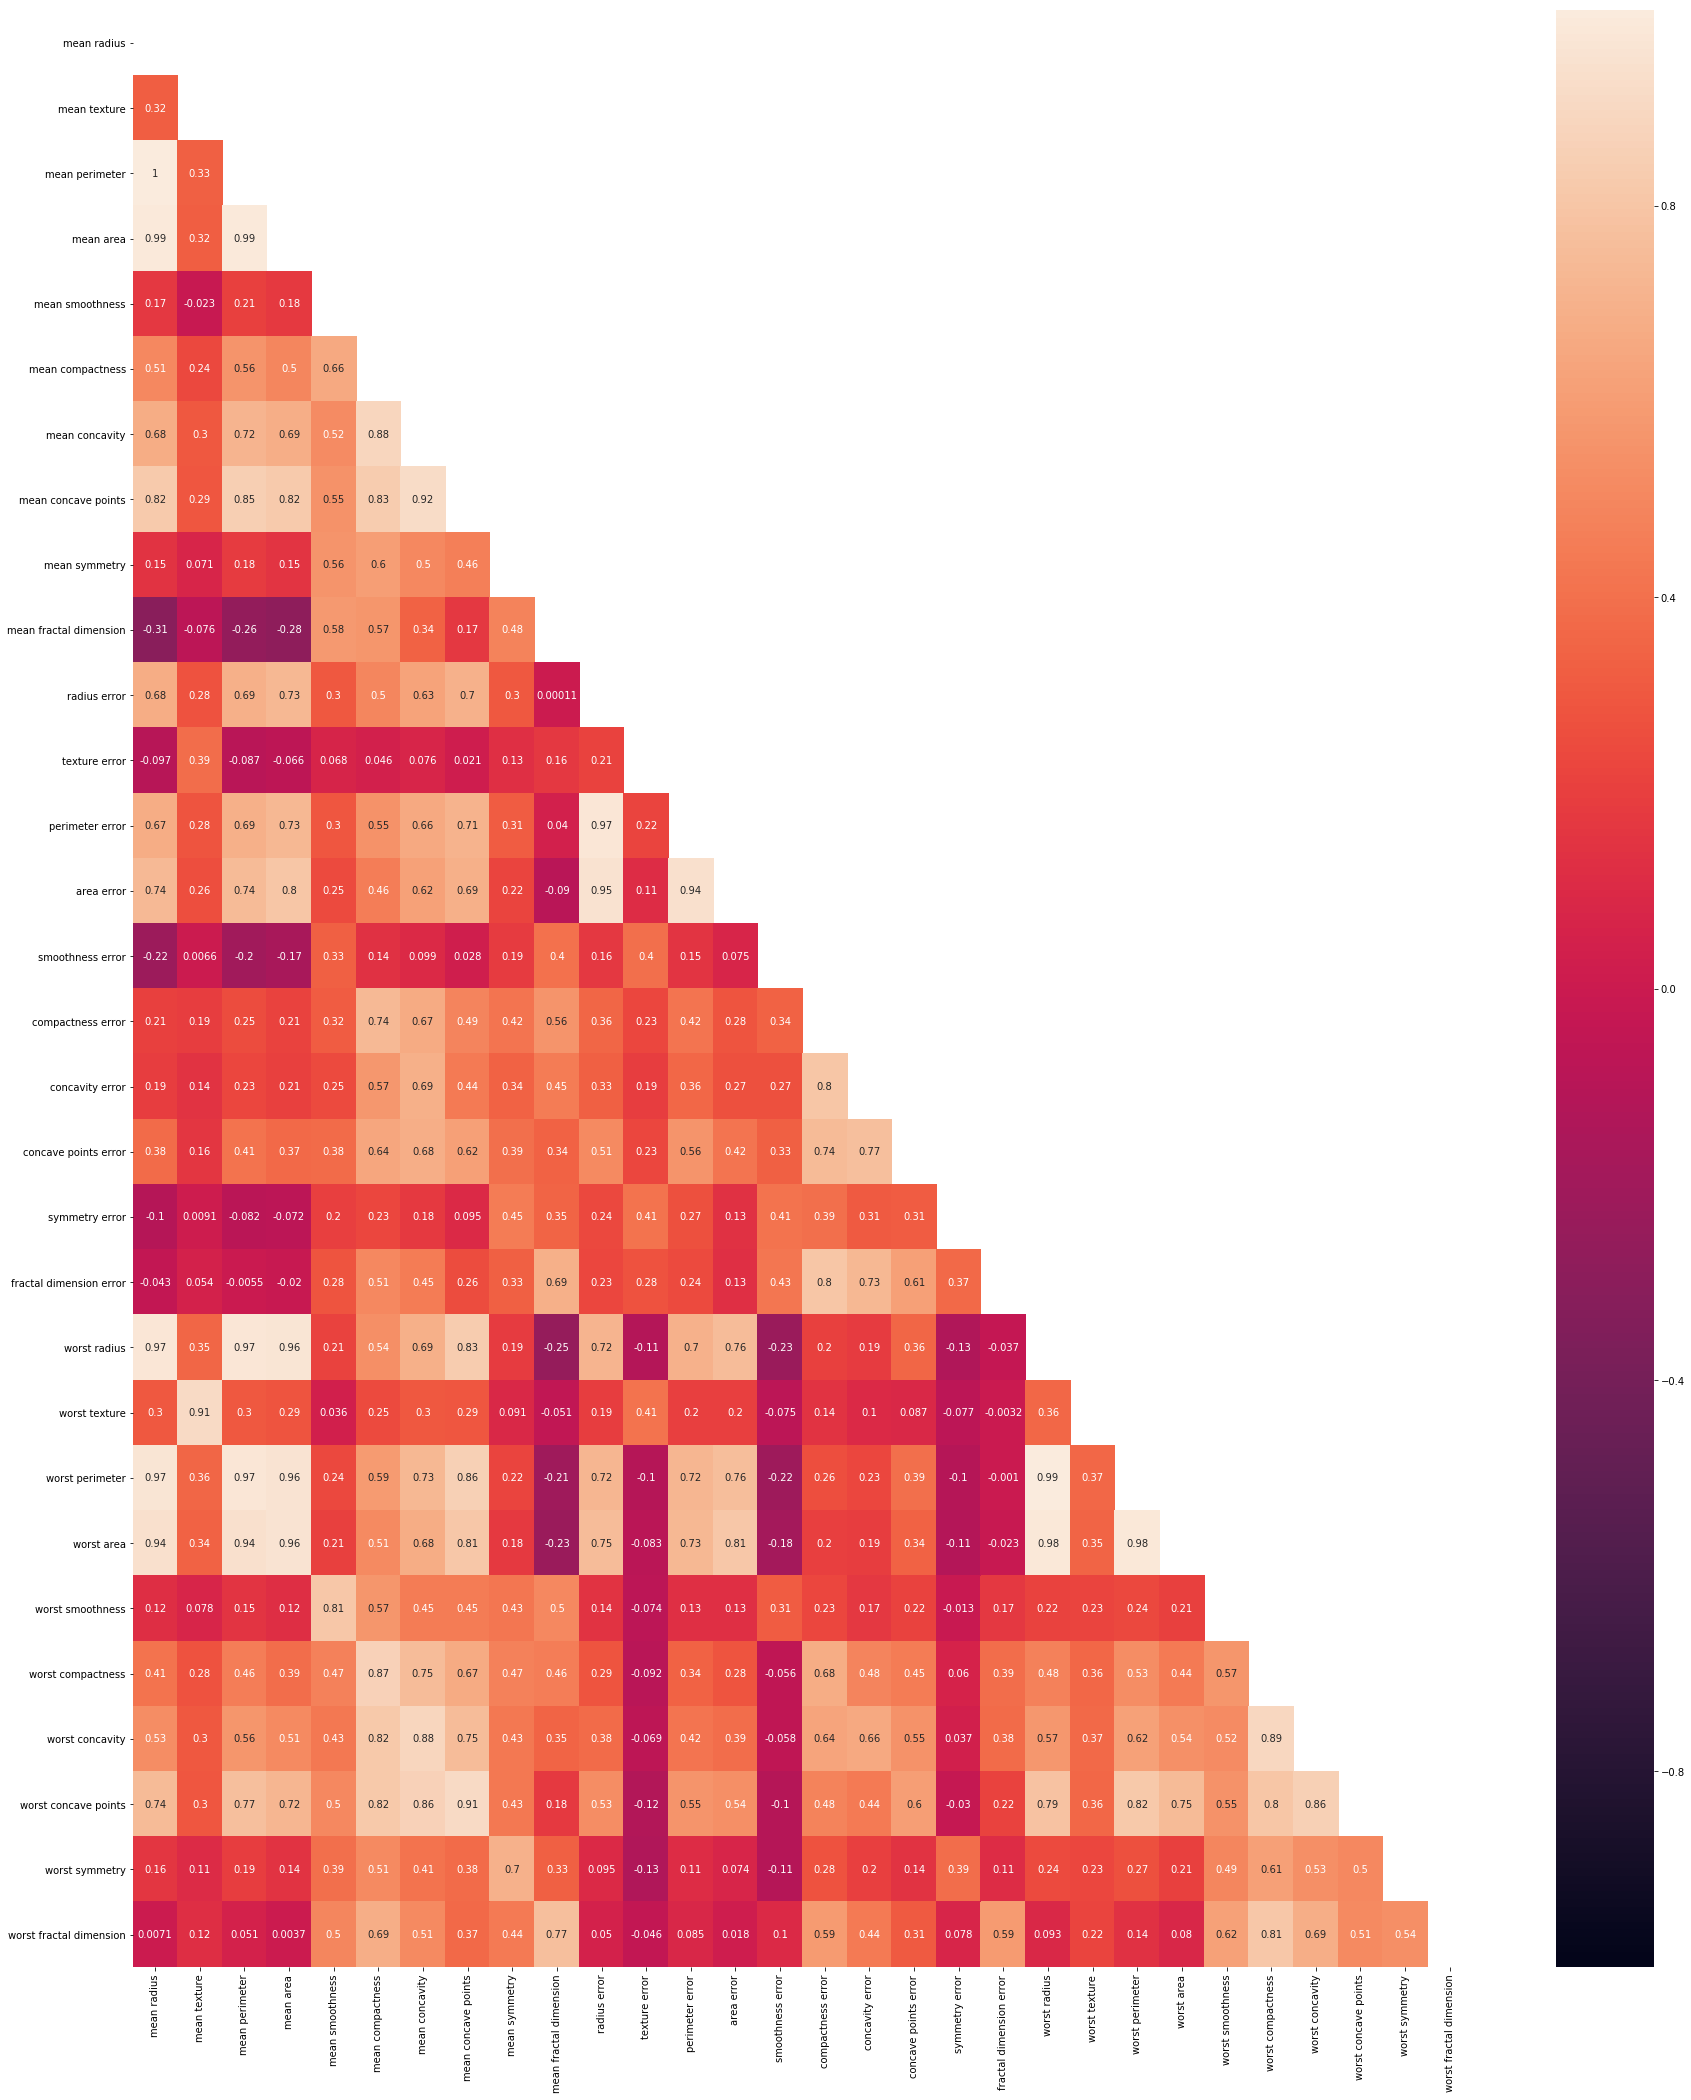

In [50]:
#Setting the size of the map
plt.rcParams['figure.figsize'] = [30,36]


# Correlation Matrix of the whole data set, so we can see the relationship between all the variables. 
correlation_matrix = breast_data.corr()
plt.show()

# Heatmap
mask = np.zeros_like(correlation_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, vmax = 1.0, vmin = -1.0, annot = True, mask=mask)
plt.show()

### Some conclusions we can get from the heatmap
Something that caugh our attention at the beggining was the super-high correlation between some specific variables, but now we've read deeply into them, they make TOTALLY SENSE. 
The most related variables are ***something_perimeter--something_area*** (where "something" stands for worst, texture.
This was pretty obvious, the higher the area, the higher the perimeter

### Here we plot some graphs we think are the most important becuase of how differentiated they are because of how good is the correlation 

In the graphs you're about to see you can easily tell the correlation would be higher, but there are some outliers

<function matplotlib.pyplot.show(*args, **kw)>

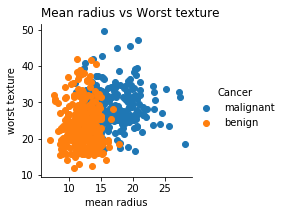

In [51]:
g = sns.FacetGrid(breast_data, hue = 'Cancer')
g = g.map(plt.scatter, 'mean radius','worst texture')
g = g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean radius vs Worst texture')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

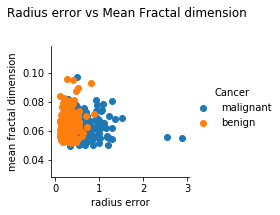

In [52]:
g = sns.FacetGrid(breast_data, hue = 'Cancer')
g = g.map(plt.scatter, 'radius error','mean fractal dimension')
g = g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Radius error vs Mean Fractal dimension')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

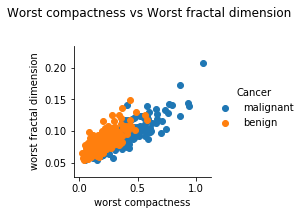

In [53]:
g = sns.FacetGrid(breast_data, hue = 'Cancer')
g = g.map(plt.scatter, 'worst compactness','worst fractal dimension')
g = g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Worst compactness vs Worst fractal dimension')
plt.show

### Now something different. 
In the next two graphs we are going to see the behaivor of the mean radius. Both of the plots are going to show us the size on the 'x' axis, and on the 'y' axis is going to show us count of the registers, and they are going to be devided into malignant and benign. We wanted to put this two graph together in order to be more visual, and by addyng the quartilles to  the violing plot we can see how the mach with the boxplot. The violing was a resource to see graphiclly the distribution, and of course the changes in the curves, and the boxplot to show us the outliers which and by explaining the reason of the sharp enging in both sections

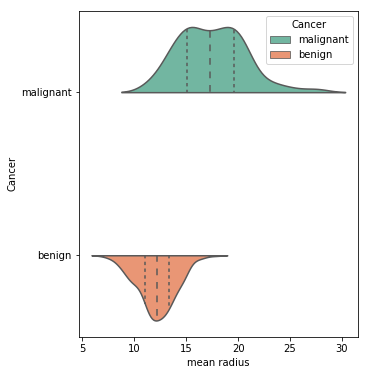

In [54]:
plt.rcParams['figure.figsize'] = [5,6]

violin_tab = sns.violinplot(x="mean radius", y="Cancer", hue="Cancer", data=breast_data, palette="Set2", split=True, inner = 'quartile')

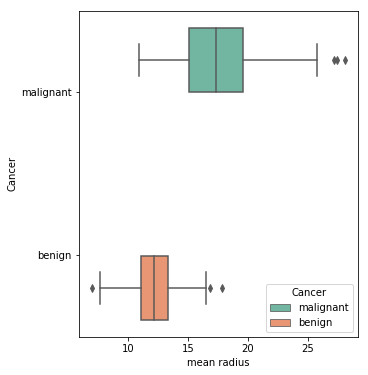

In [55]:
ax = sns.boxplot(x="mean radius", y="Cancer", hue="Cancer", data=breast_data, palette="Set2")